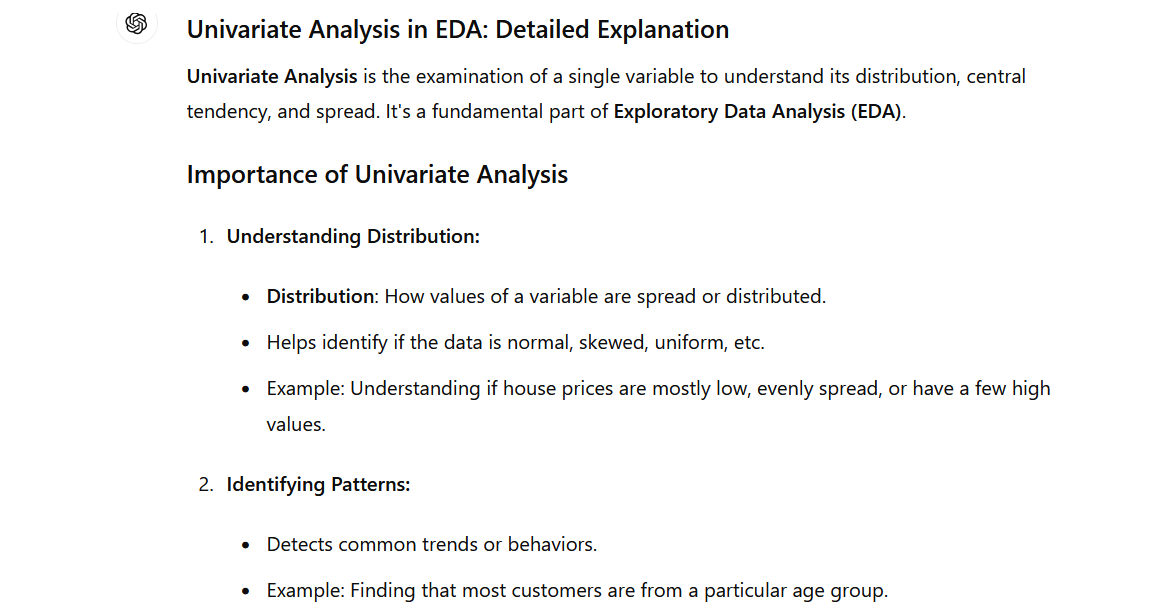

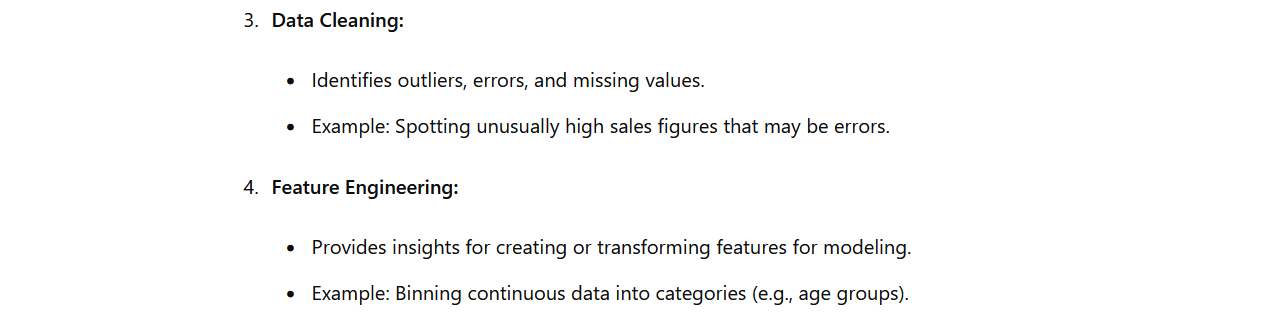

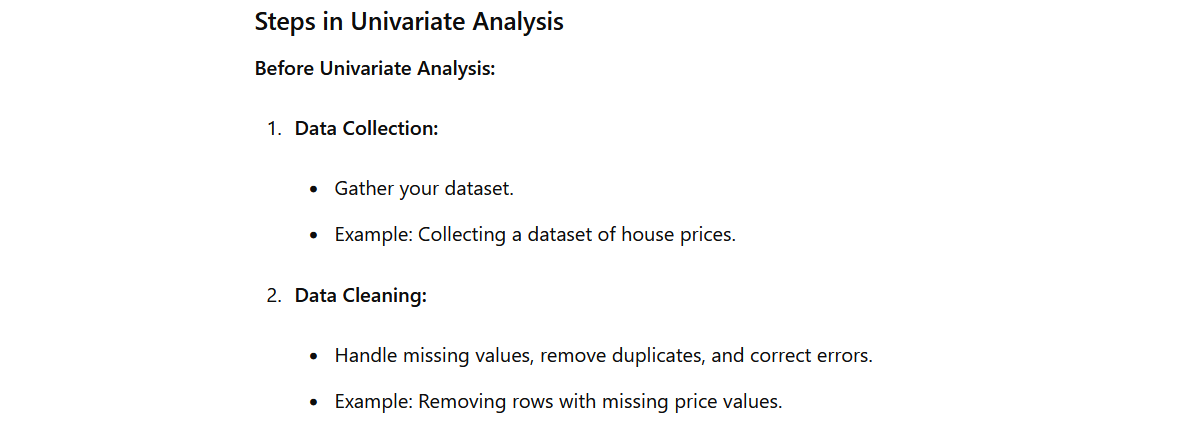

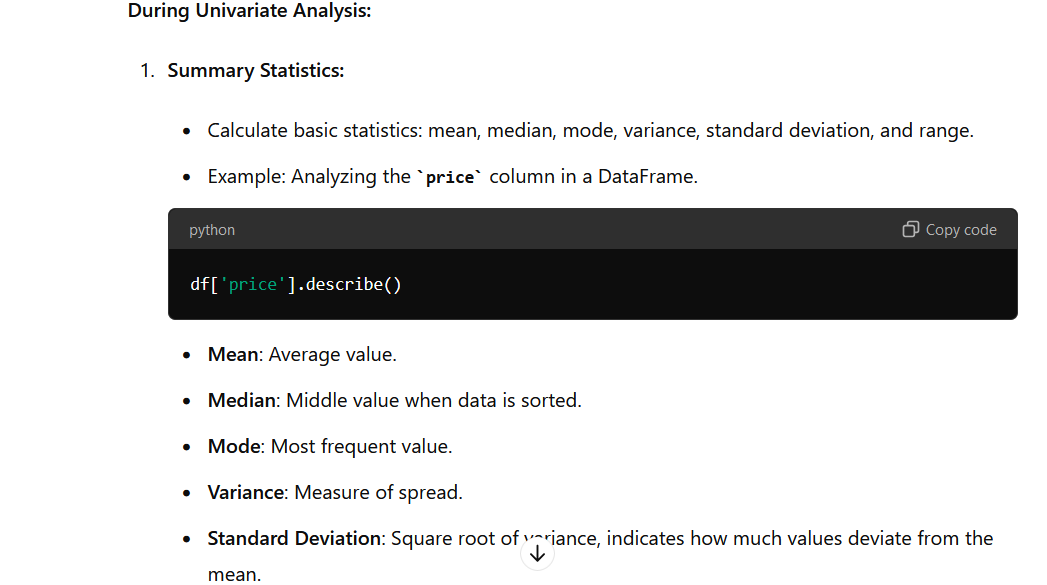

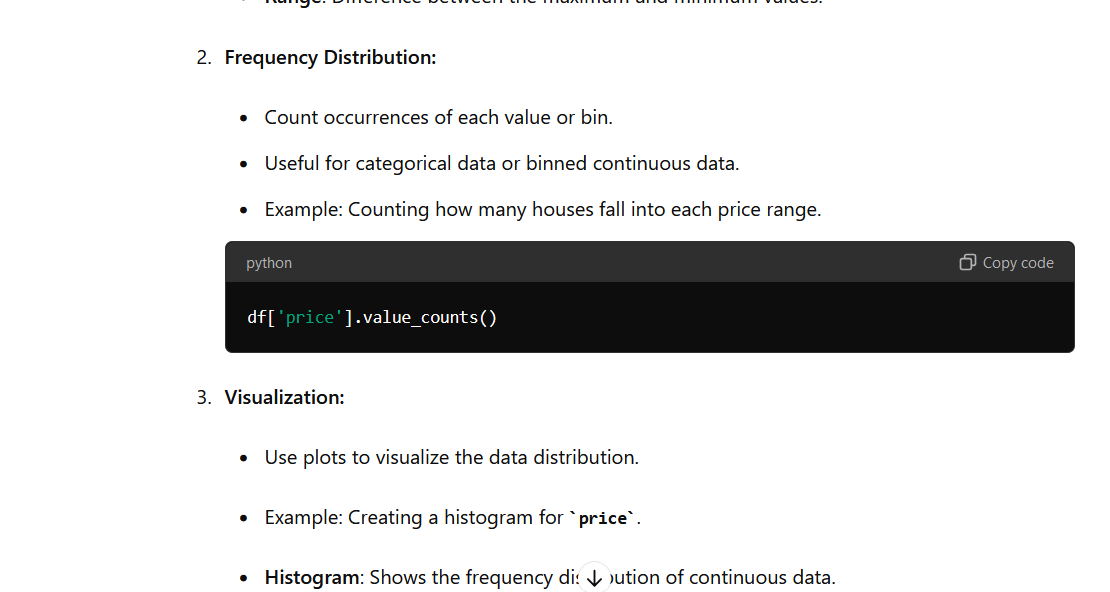

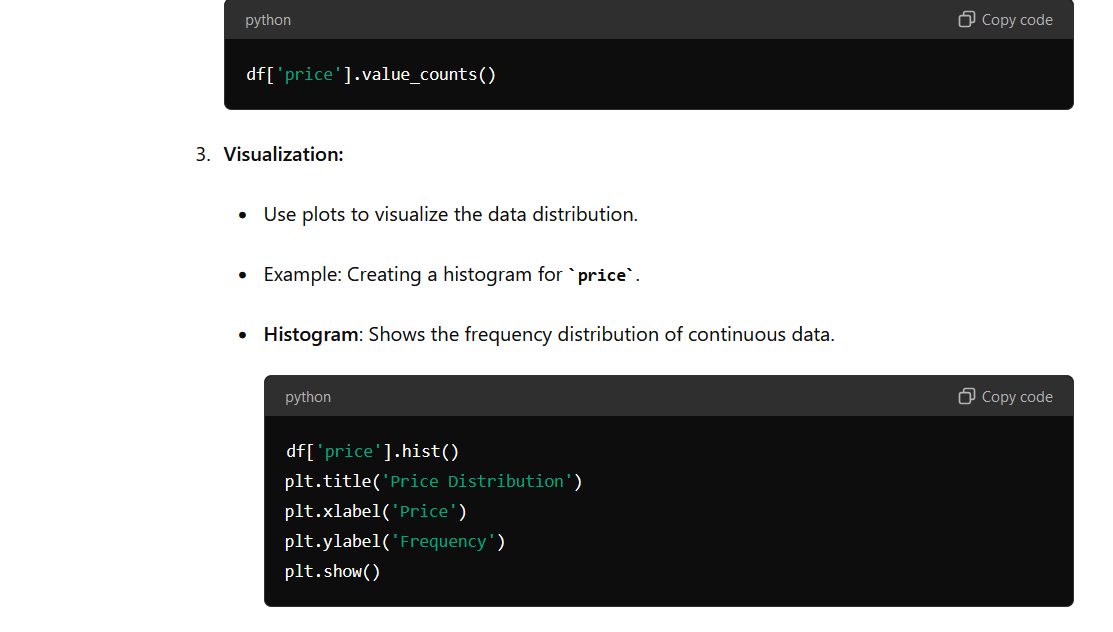

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv')

In [3]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


In [4]:
df.shape

(3803, 23)

In [5]:
df.duplicated().sum()

126

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


#property_type

<Axes: xlabel='property_type'>

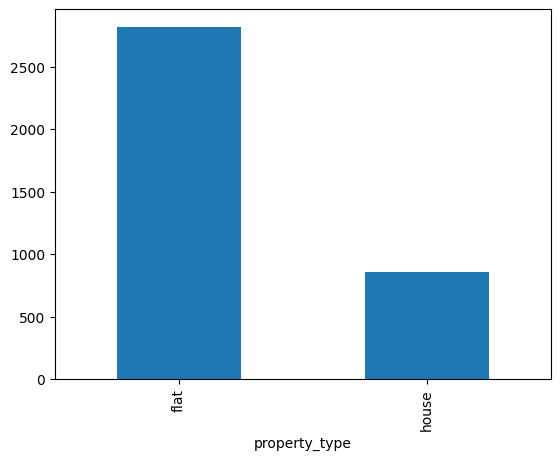

In [8]:
df['property_type'].value_counts().plot(kind='bar')

#Observations
#Flats are in majority(75 percent) and there are less number of houses(~25 percent)
#No missing values

#society

In [9]:
df['society'].value_counts().shape

(676,)

In [10]:
df['society'].value_counts()

society
independent                               486
tulip violet                               75
ss the leaf                                73
dlf new town heights                       42
shapoorji pallonji joyville gurugram       42
                                         ... 
dlf gardencity enclave                      1
nitin vihar                                 1
landmark the residency                      1
kw royal court                              1
surendra homes dayaindependentd colony      1
Name: count, Length: 676, dtype: int64

In [11]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

society
tulip violet                            0.023511
ss the leaf                             0.046395
shapoorji pallonji joyville gurugram    0.059561
dlf new town heights                    0.072727
signature global park                   0.083699
                                          ...   
ramsons kshitij                         0.490282
umang monsoon breeze                    0.494357
ats kocoon                              0.498433
ireo the corridors                      0.502194
central park flower valley              0.505956
Name: proportion, Length: 75, dtype: float64

In [12]:
society_counts = df['society'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': 1,
 'High (50-100)': 2,
 'Average (10-49)': 92,
 'Low (2-9)': 273,
 'Very Low (1)': 308}

<Axes: xlabel='society'>

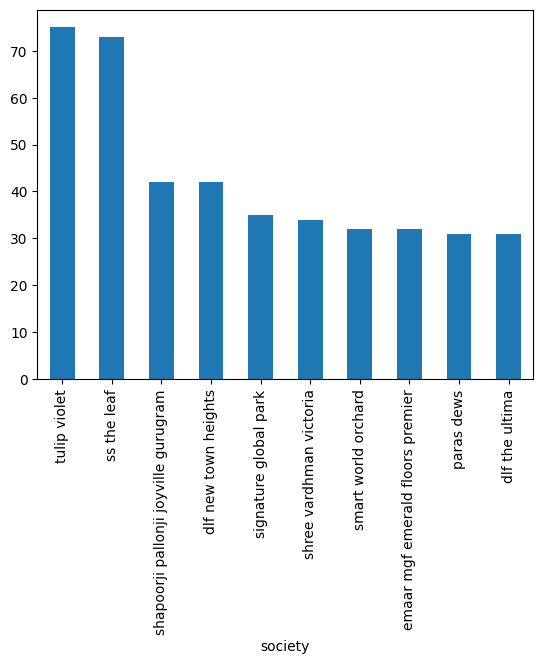

In [13]:
# top 10 socities
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [14]:
df['society'].isnull().sum()

1

In [15]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2693,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,...,NaN,1625.0,NaN,0,0,0,0,0,0,0


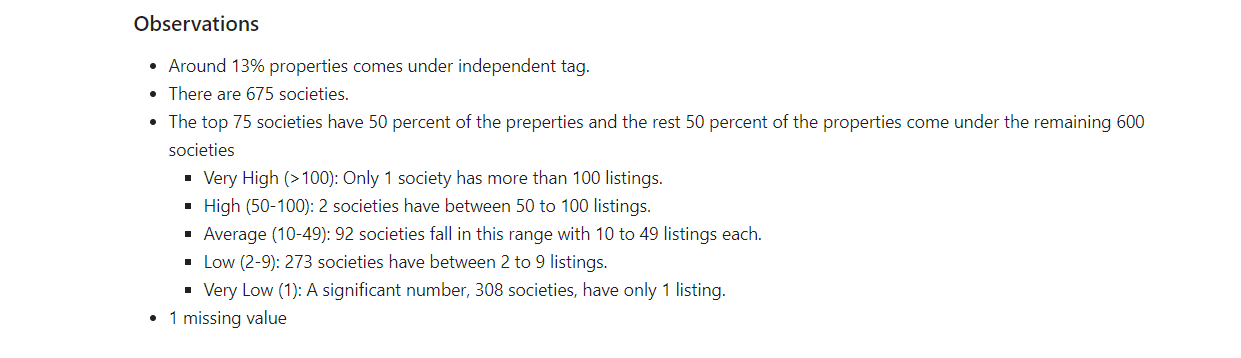

#sector

In [16]:
# unique sectors
df['sector'].value_counts().shape

(113,)

<Axes: xlabel='sector'>

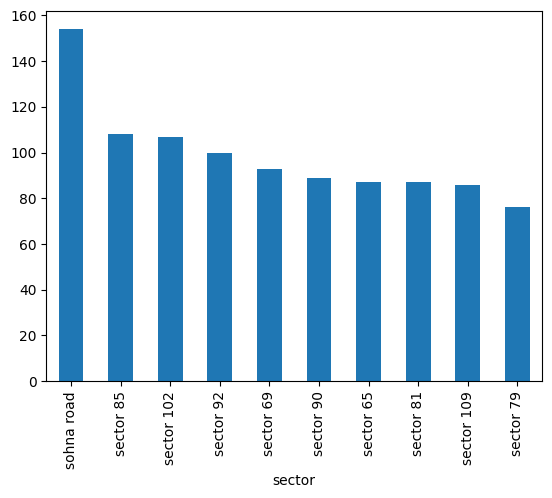

In [17]:
# top 10 sectors
df['sector'].value_counts().head(10).plot(kind='bar')

In [18]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': 3,
 'High (50-100)': 25,
 'Average (10-49)': 63,
 'Low (2-9)': 21,
 'Very Low (1)': 1}

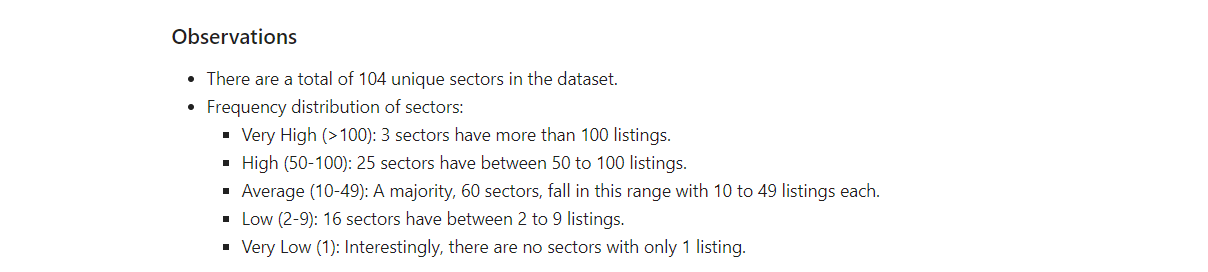

In [19]:
df['price'].isnull().sum()

17

In [20]:
df['price'].describe()

count    3660.000000
mean        2.533664
std         2.980623
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

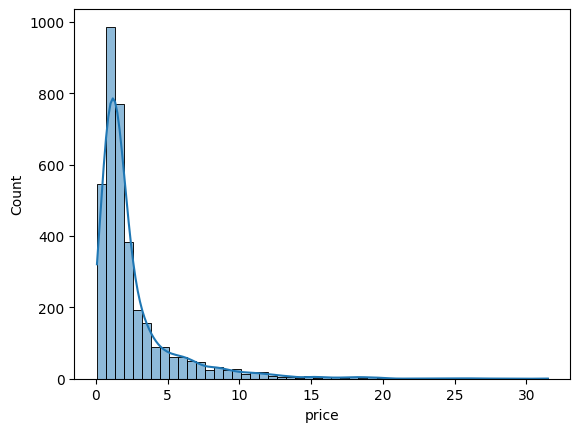

In [21]:
sns.histplot(df['price'], kde=True, bins=50)

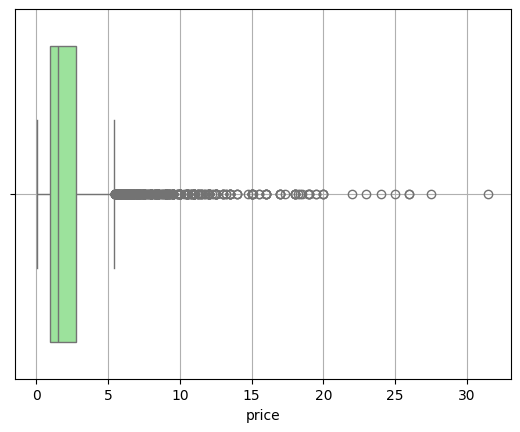

In [22]:
sns.boxplot(x=df['price'], color='lightgreen')
plt.grid()

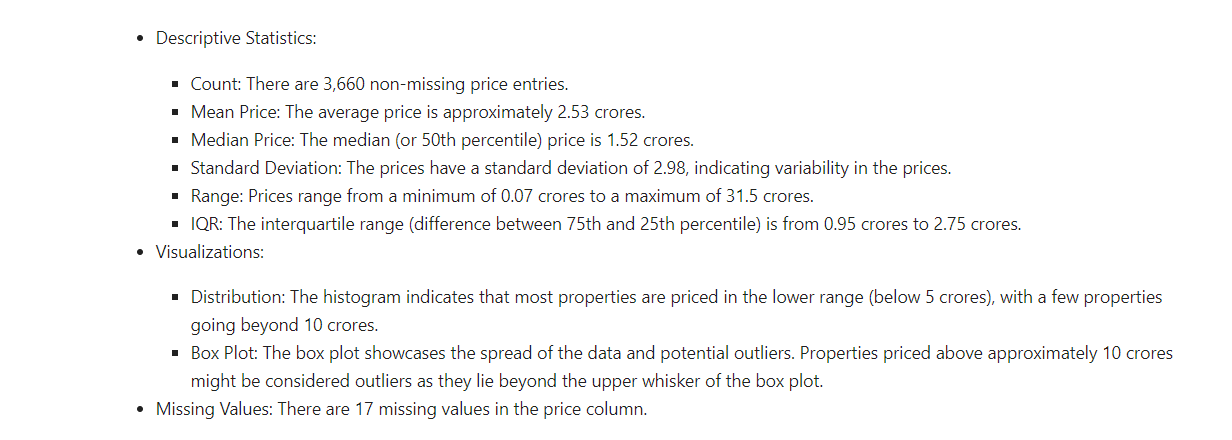

In [23]:
# Skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

3.2791704733134623 14.933372629214258


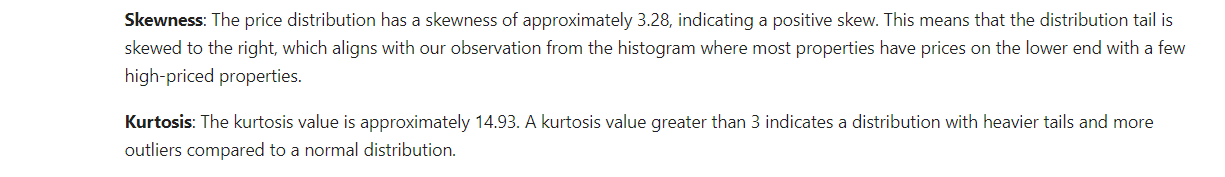

In [24]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.250
0.05     0.370
0.95     8.500
0.99    15.264
Name: price, dtype: float64

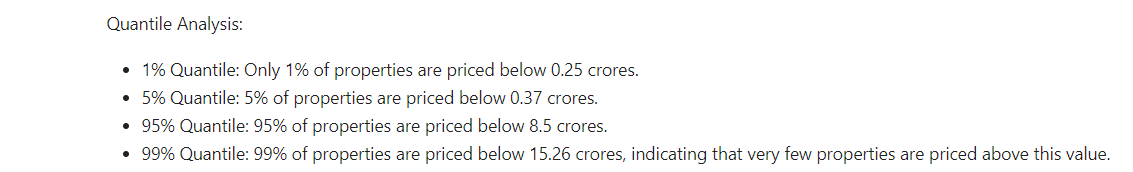

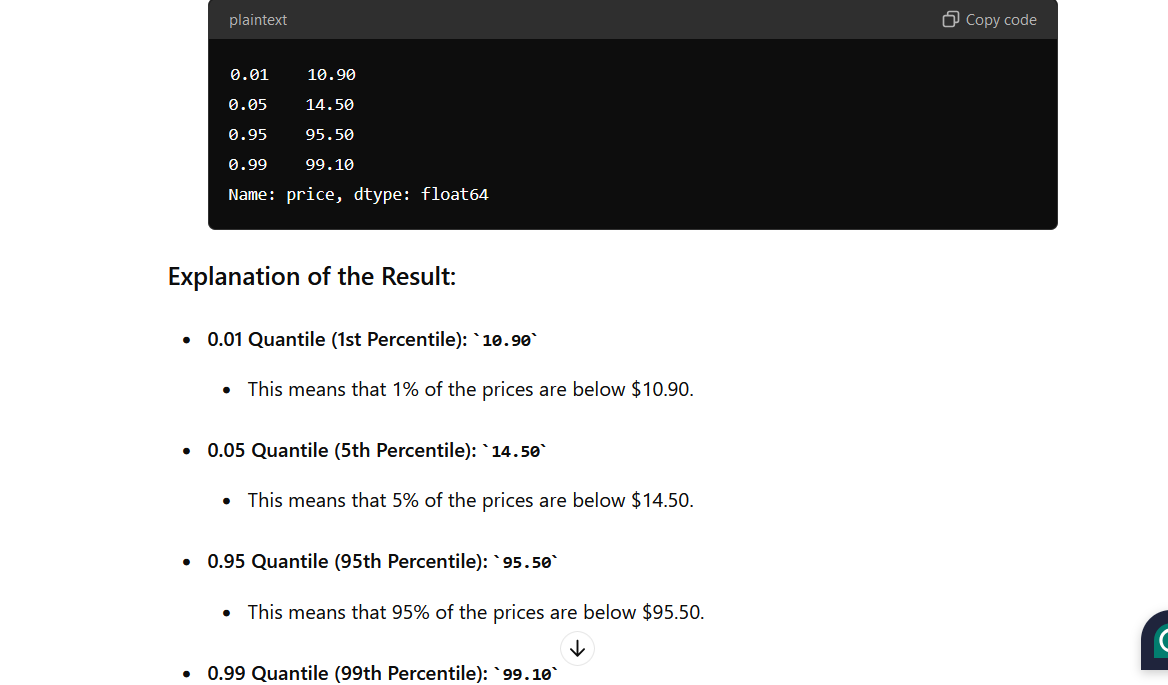

In [25]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
print(Q1 , Q3)
IQR = Q3 - Q1

IQR

0.95 2.75


1.8

In [26]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.7500000000000002 5.45


In [27]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(425, 23)

In [28]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

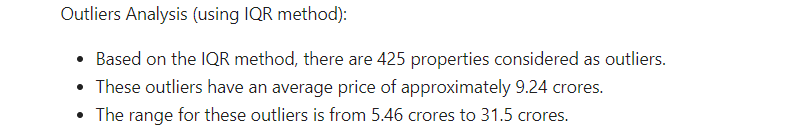

<Axes: xlabel='price'>

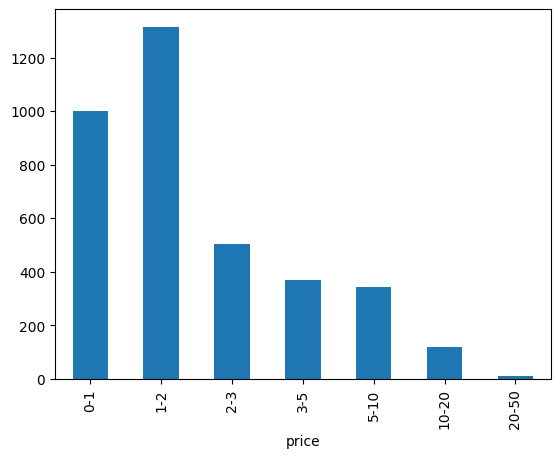

In [29]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

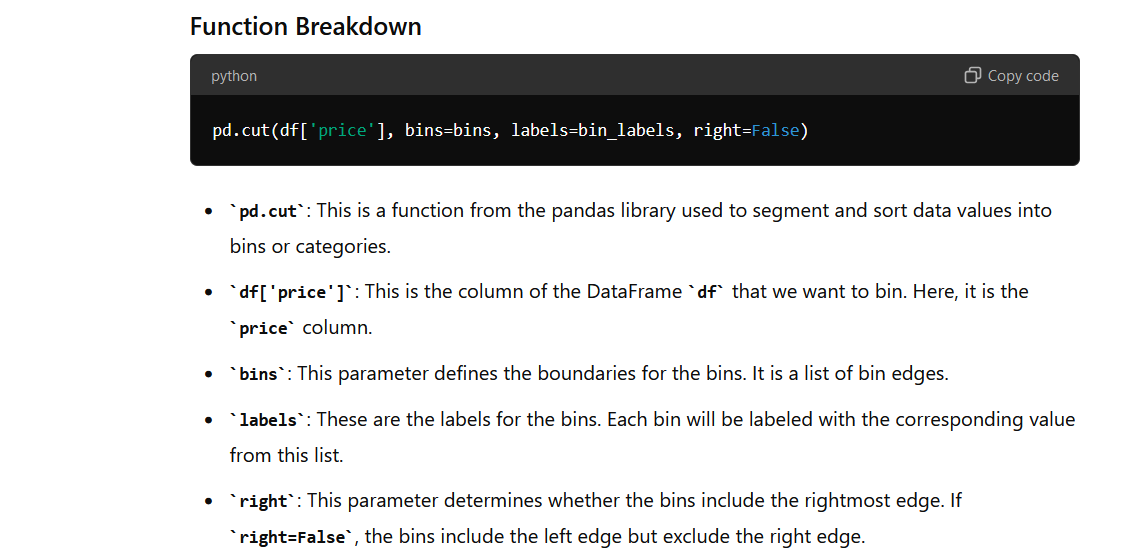

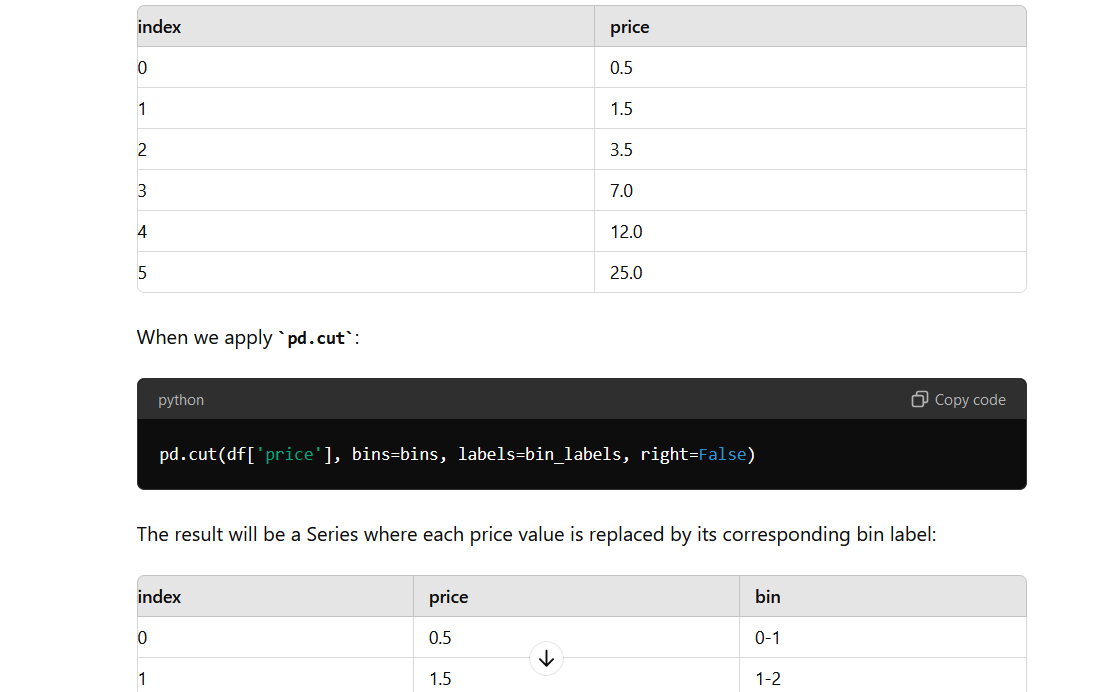

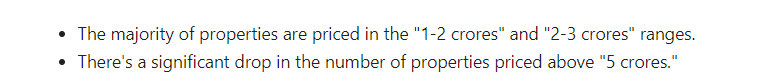

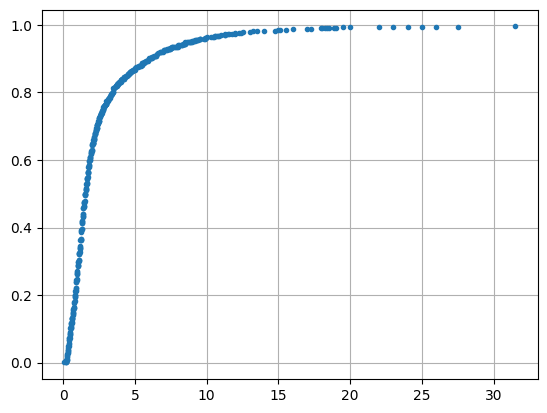

In [30]:
# ecdf plot
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

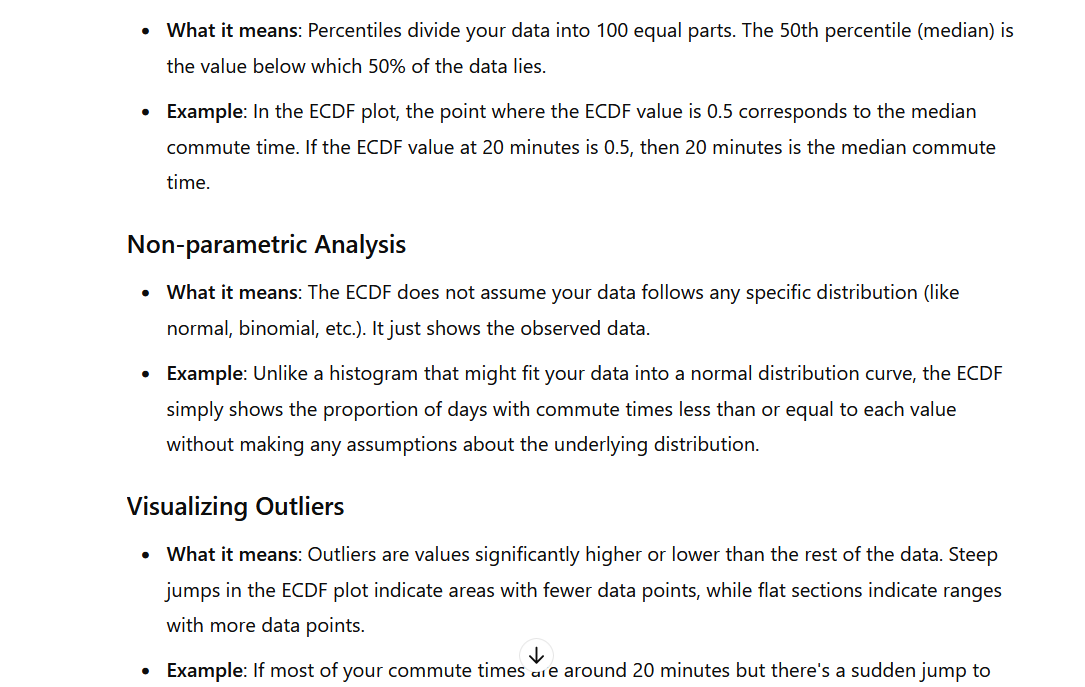

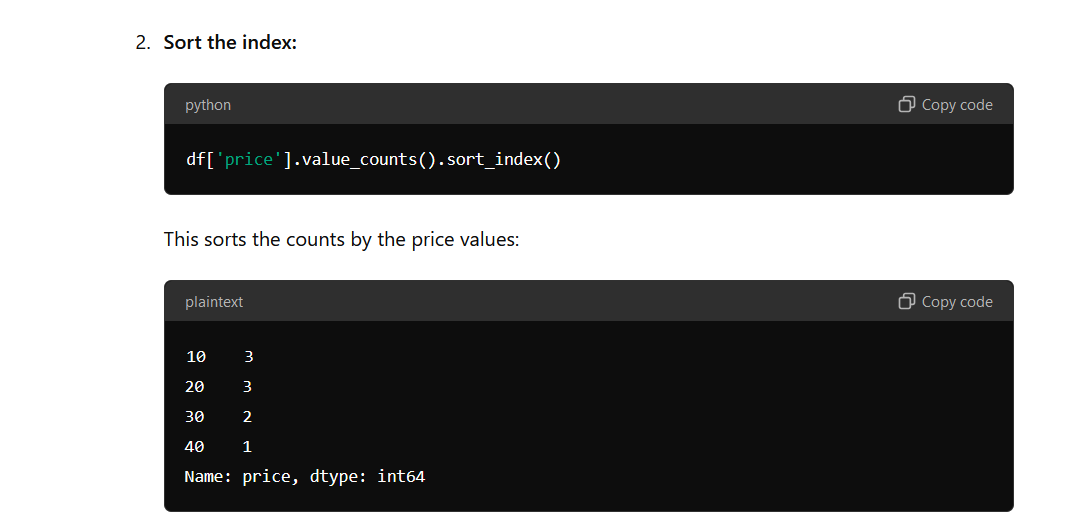

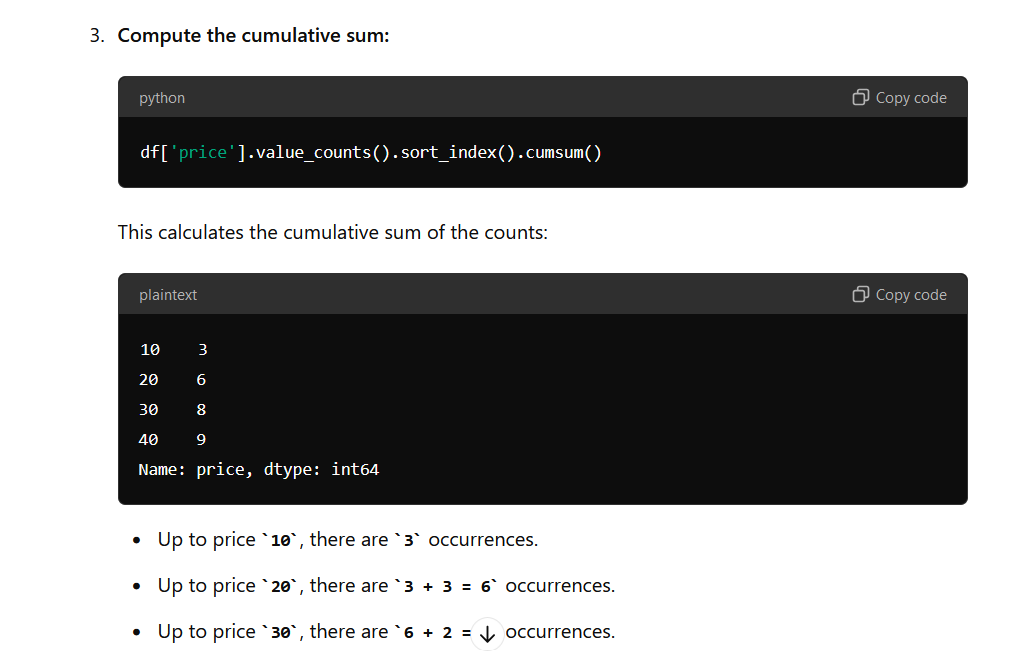

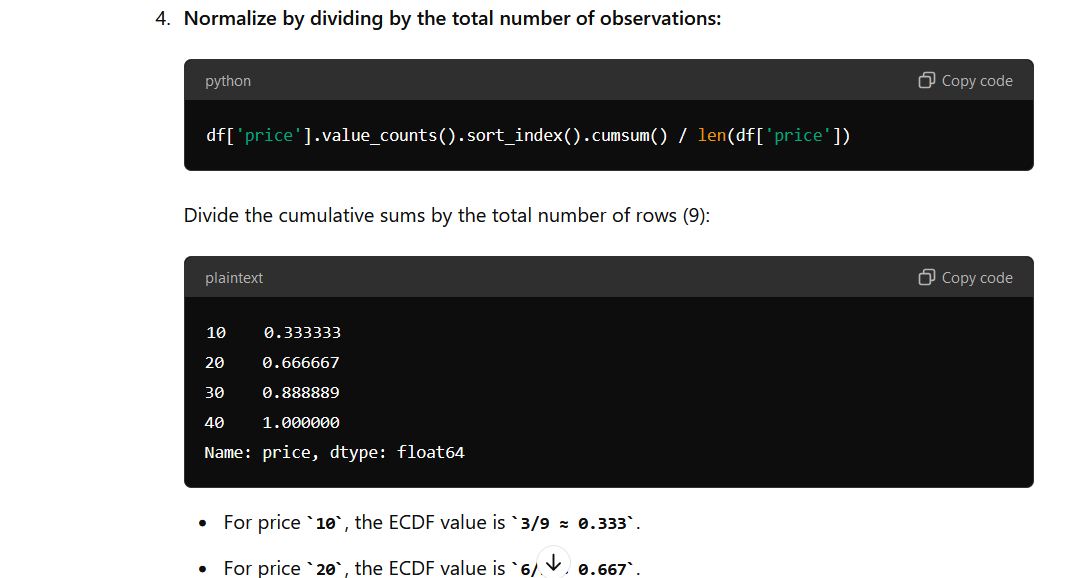

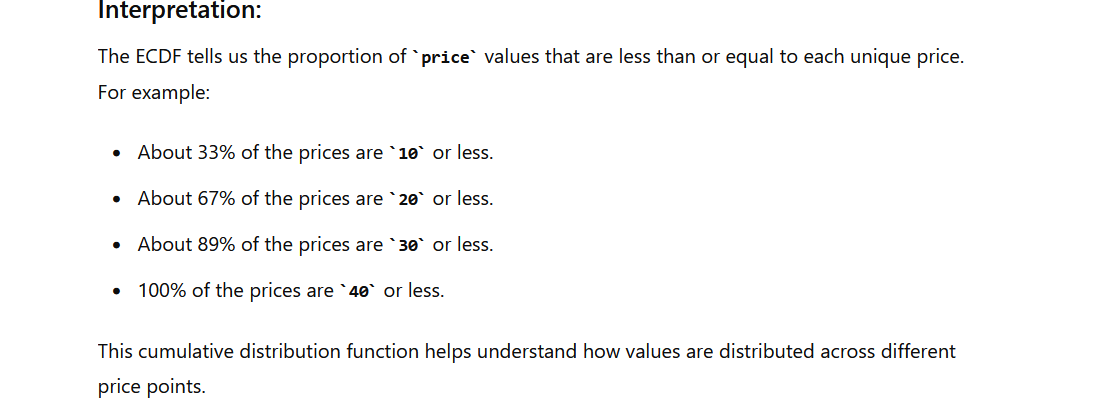

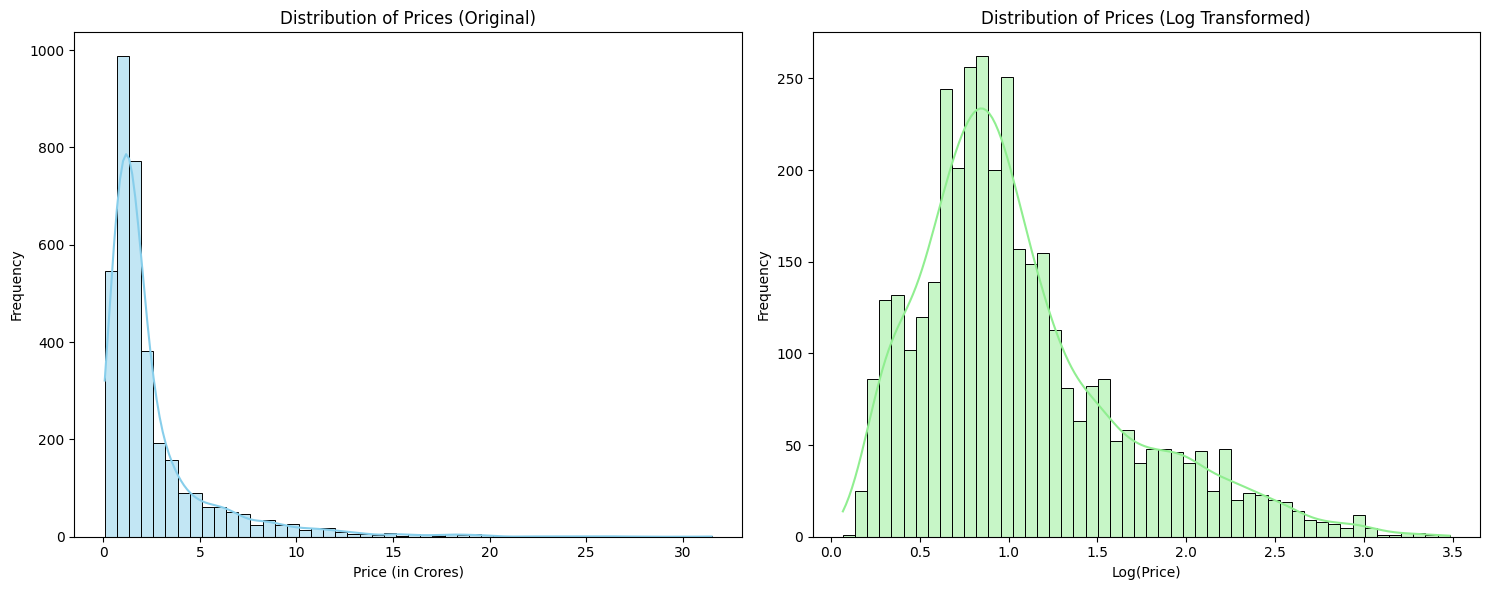

In [31]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

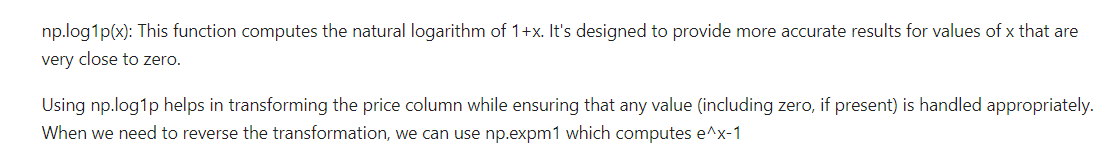

In [32]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.0740709565255318 0.9646692415449296


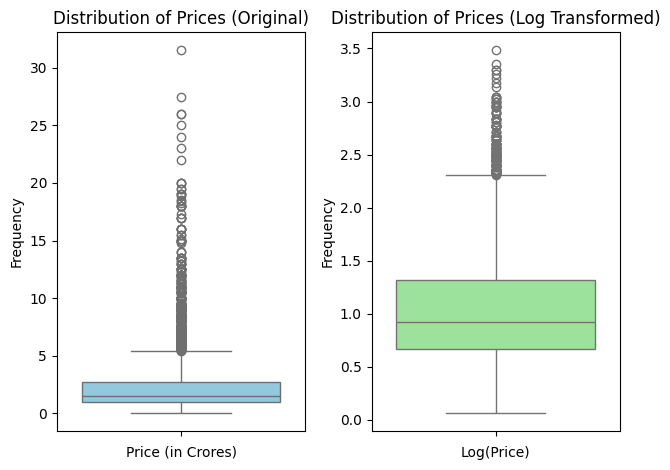

In [33]:
# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#price_per_sqft

In [34]:
df['price_per_sqft'].isnull().sum()

17

In [35]:
df['price_per_sqft'].describe()

count      3660.000000
mean      13892.668306
std       23210.067190
min           4.000000
25%        6817.250000
50%        9020.000000
75%       13880.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

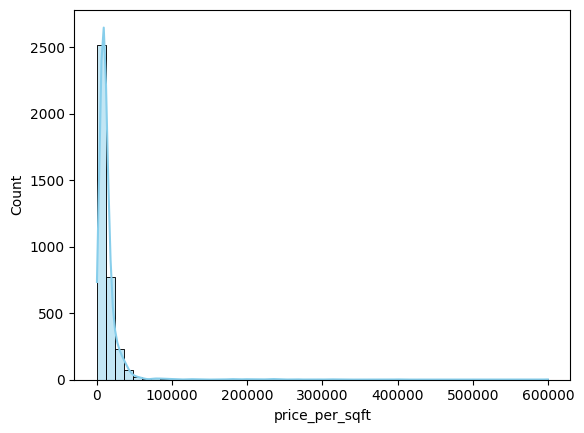

In [36]:
sns.histplot(df['price_per_sqft'], bins=50, color='skyblue', kde=True)

Most properties have a price_per_sqft ranging between approximately ₹0 and ₹40,000. There is a significant concentration in the lower range, with a few properties having exceptionally high price_per_sqft.

<Axes: ylabel='price_per_sqft'>

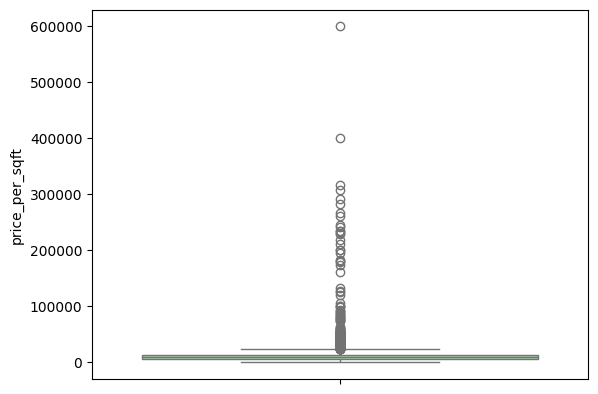

In [37]:
sns.boxplot(df['price_per_sqft'], color='lightgreen')

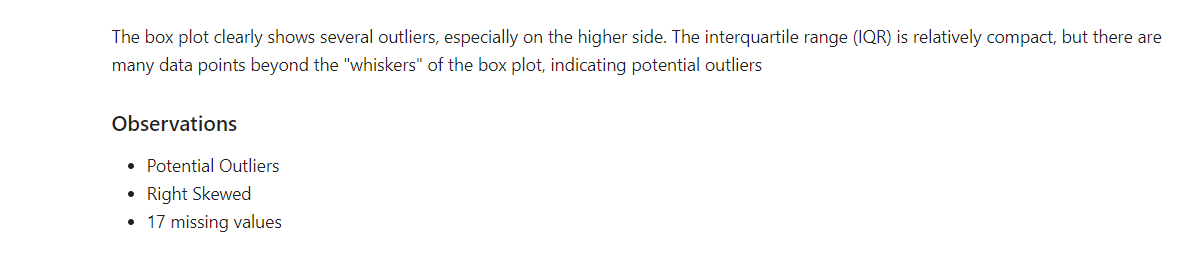

#bedRoom

In [38]:
df['bedRoom'].isnull().sum()

0

<Axes: xlabel='bedRoom'>

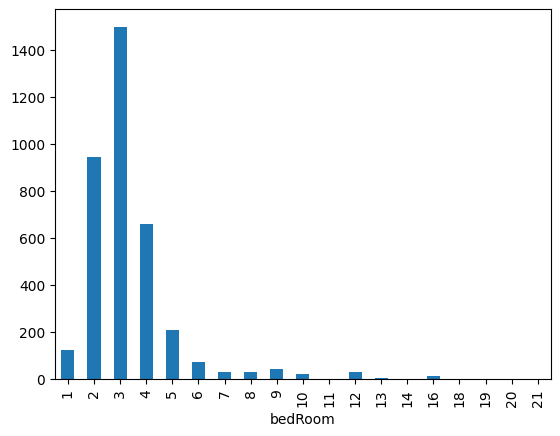

In [39]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

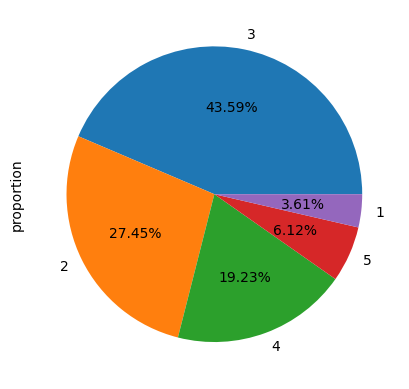

In [40]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

#bathroom

In [41]:
df['bathroom'].isnull().sum()

0

<Axes: xlabel='bathroom'>

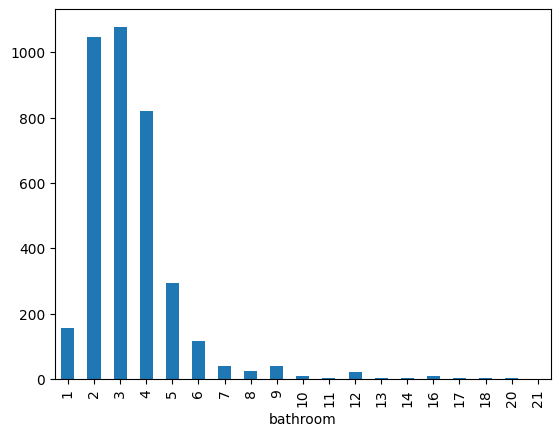

In [42]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

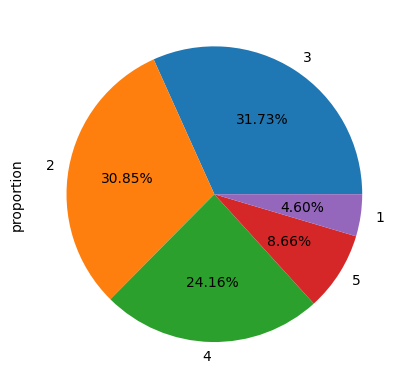

In [43]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [44]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


#balcony

In [45]:
df['balcony'].isnull().sum()

0

<Axes: xlabel='balcony'>

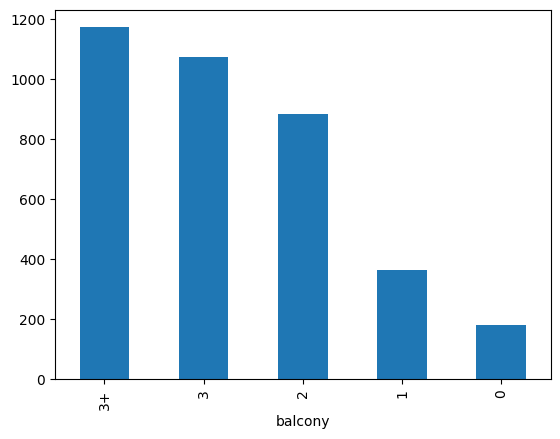

In [46]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

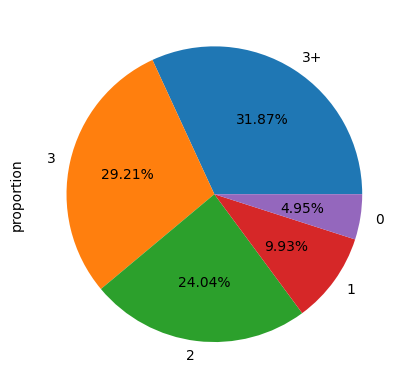

In [47]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [48]:
df.iloc[:,10:].head()

,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,17.0,NaN,New Property,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


In [49]:
df['floorNum'].isnull().sum()

19

In [50]:
df['floorNum'].describe()

count    3658.000000
mean        6.798250
std         6.012454
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: xlabel='floorNum'>

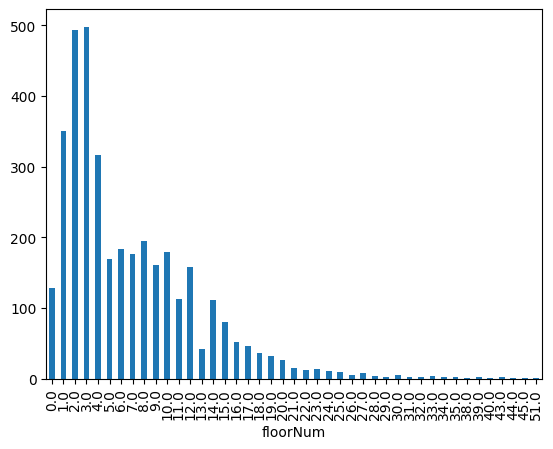

In [51]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='floorNum'>

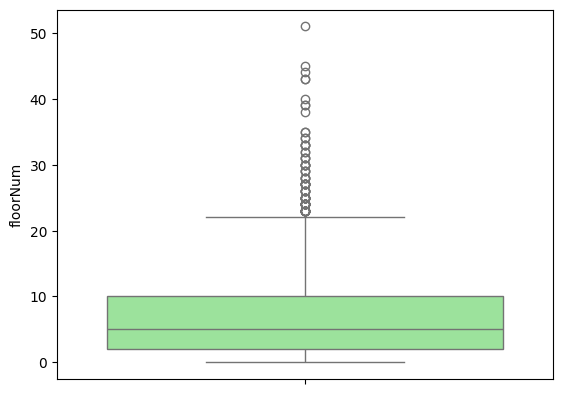

In [52]:
sns.boxplot(df['floorNum'], color='lightgreen')

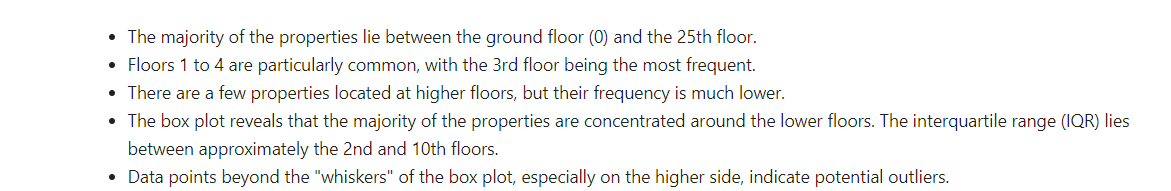

#facing

In [53]:
df['facing'].isnull().sum()

1045

In [54]:
df['facing'].fillna('NA',inplace=True)

In [55]:
df['facing'].value_counts()

facing
NA            1045
North-East     623
East           623
North          387
West           249
South          231
North-West     193
South-East     173
South-West     153
Name: count, dtype: int64

#agePossession

In [56]:
df['agePossession'].isnull().sum()

0

In [57]:
df['agePossession'].value_counts()

agePossession
Relatively New        1646
New Property           593
Moderately Old         563
Undefined              306
Old Property           303
Under Construction     266
Name: count, dtype: int64

#areas

In [58]:
# super built up area
df['super_built_up_area'].isnull().sum()

1802

In [59]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

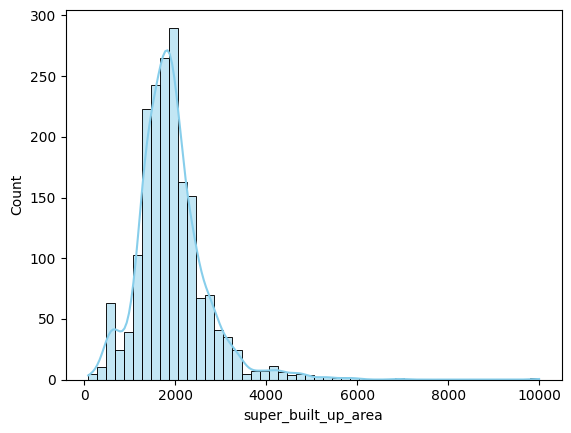

In [60]:
sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)

<Axes: ylabel='super_built_up_area'>

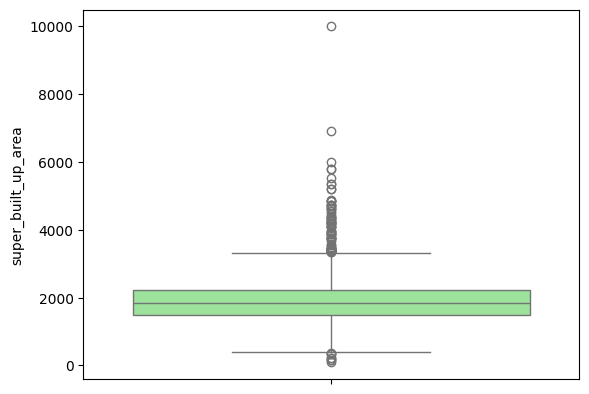

In [61]:
sns.boxplot(df['super_built_up_area'].dropna(), color='lightgreen')

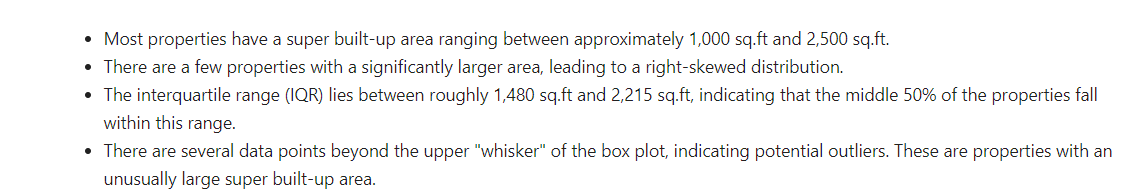

In [62]:
# built up area
df['built_up_area'].isnull().sum()

1987

In [63]:
df['built_up_area'].describe()

count      1690.000000
mean       2379.585816
std       17942.880237
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

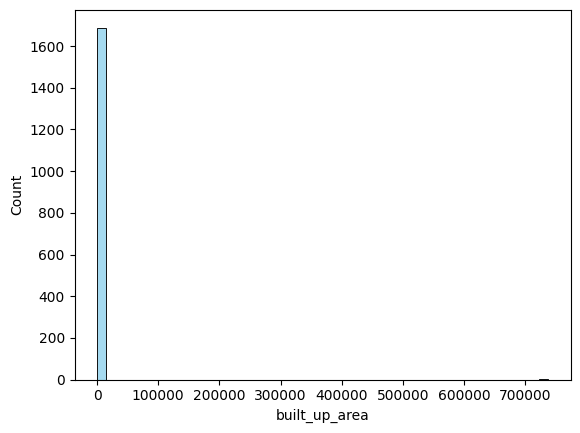

In [64]:
sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: ylabel='built_up_area'>

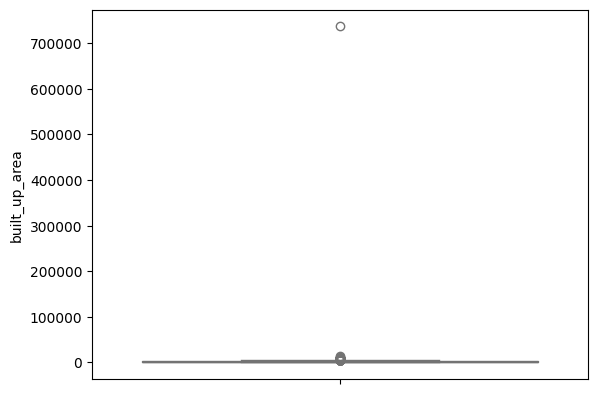

In [65]:
sns.boxplot(df['built_up_area'].dropna(), color='lightgreen')

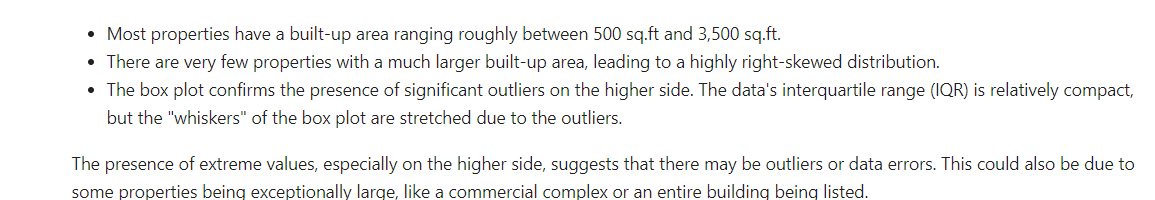

In [66]:
# carpet area
df['carpet_area'].isnull().sum()

1805

In [67]:
df['carpet_area'].describe()

count      1872.000000
mean       2529.179507
std       22799.836449
min          15.000000
25%         843.000000
50%        1300.000000
75%        1790.000000
max      607936.000000
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Count'>

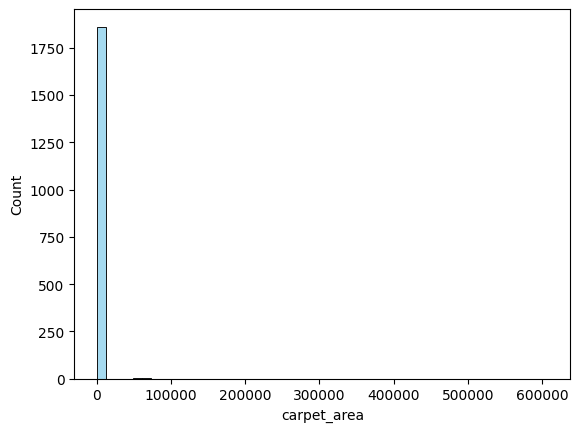

In [68]:
sns.histplot(df['carpet_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: ylabel='carpet_area'>

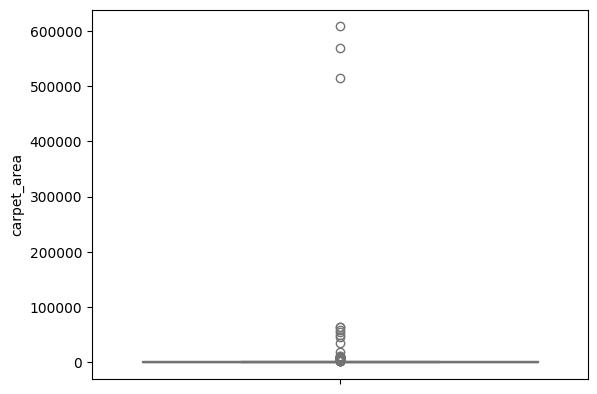

In [69]:
sns.boxplot(df['carpet_area'].dropna(), color='lightgreen')

In [70]:
df.iloc[:,16:]

,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0,0,0,0,0,0,8
1,1,1,0,0,0,0,38
2,0,0,0,0,0,0,15
3,0,0,0,0,0,0,49
4,0,1,0,0,1,1,174
...,...,...,...,...,...,...,...
3798,0,0,0,0,0,0,73
3799,1,1,1,1,0,0,160
3800,0,0,0,0,0,1,67
3801,1,1,1,1,0,0,76


#additional rooms

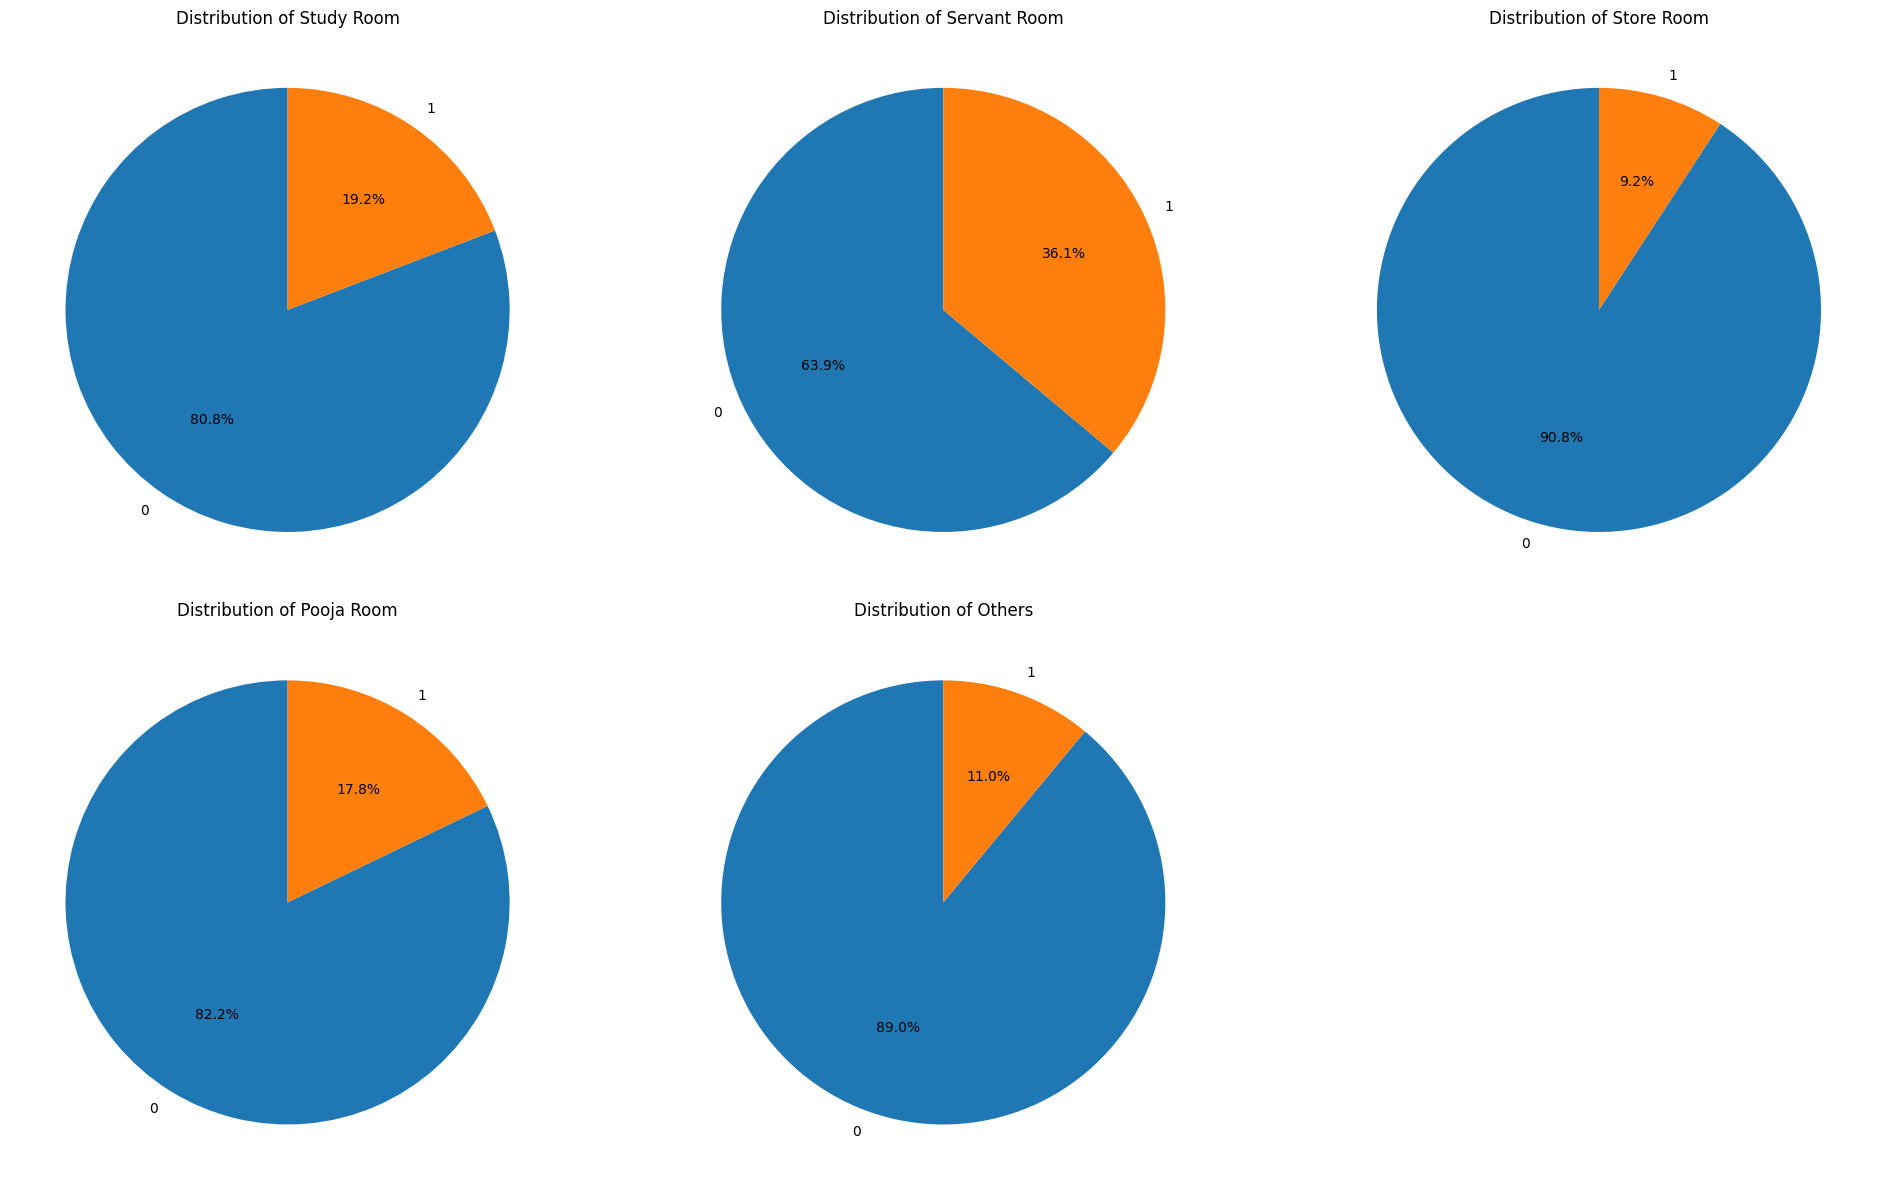

In [71]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

#furnishing_type

In [72]:
df['furnishing_type'].value_counts()

furnishing_type
0    2411
1    1059
2     207
Name: count, dtype: int64

<Axes: ylabel='count'>

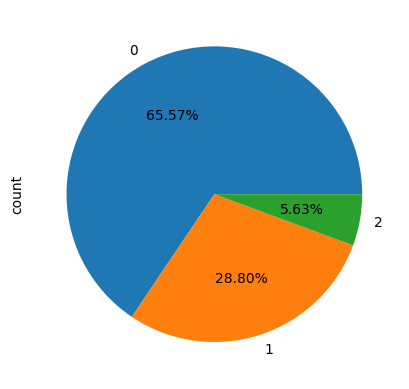

In [73]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

#luxury score

In [74]:
df['luxury_score'].isnull().sum()

0

In [75]:
df['luxury_score'].describe()

count    3677.000000
mean       71.512918
std        53.059082
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

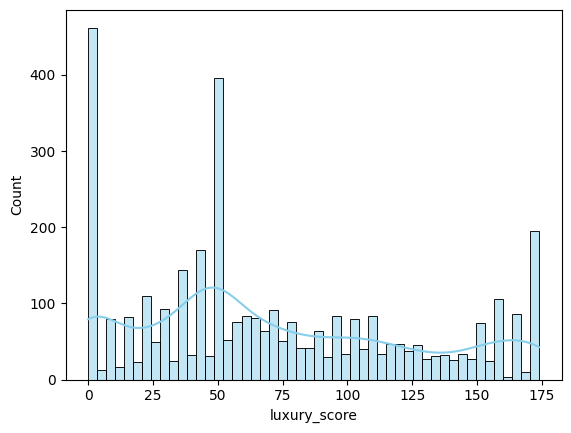

In [76]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

<Axes: ylabel='luxury_score'>

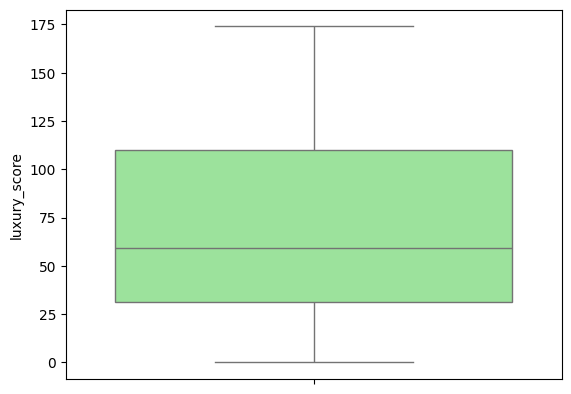

In [77]:
sns.boxplot(df['luxury_score'], color='lightgreen')

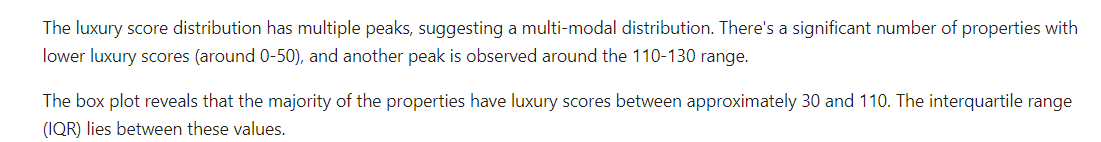

In [78]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,1,174
